# Support Vector Machines
### Author: Beixian Gu

## Table of content
- Introduction
- Algorithm Description
- Applications on Datasets

## Introduction
Support Vector Machines (SVMs) are a type of supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis. 

![SVM Image](https://ars.els-cdn.com/content/image/3-s2.0-B978032385214200001X-f06-02-9780323852142.jpg)


Given a training dataset of instance-label pairs $(x_i, y_i), i = 1, ..., n$ where $x_i ∈ R^p$ and $y ∈ {1, -1}^n$, the support vector machines require the solution of the following optimization problem:
$$
Min\{w, b, \xi\}   \frac{1}{2} |w|^2 + C \sum \xi_i 
$$

$$
s.t. y_i(w x_i - b) ≥ 1 - \xi_i
$$
$$
\xi_i ≥ 0
$$
Here,
$w$ is the normal vector to the hyperplane
$b$ is the bias or offset
$ξ_i$ are the slack variables which allow for instances to be in the wrong side of the margin
$C$ is the regularization parameter, the larger the $C$, the less the optimization tolerates instances to be in the wrong side.
The decision function is given by:
$$
f(x) = w ⋅ x - b
$$
This will classify an instance $x$ based on the sign of the result. If it is positive, the predicted class $y$ is 1, if it is negative, the predicted class is -1.

The vector $w$ is defined as $w = Σ α_i y_i x_i$ for $i = 1, ..., n$ where each $α_i ≥ 0$ are the solutions of the dual problem, which is easier to solve. The coefficients $α_i$ are nonzero only for the support vectors.

Finally, when dealing with non-linearly separable problems, the original finite dimensional space is mapped into a much higher dimensional space, presumably making the separation easier in that space. To do this, we use the kernel trick to avoid the explicit mapping:
$$
K(x, z) = \phi(x) ⋅ \phi(z)
$$
A popular choice for the kernel is the Radial Basis Function (RBF):
$$
K(x, z) = exp(-\gamma |x - z|^2) \forall \gamma >0
$$

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

## Algorithm Description

The main idea of SVM is finding the hyperplane that best divides a dataset into two classes, as shown in the image above. Support vectors are the data points nearest to the hyperplane, the points of a dataset that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a dataset.

### Steps

The general steps to perform SVM are:

1. **Collect and prepare the data:** This involves gathering the data and preparing it for use in the SVM model. This could include tasks like dealing with missing data and converting categorical data to numerical data.

2. **Choose a kernel:** The choice of kernel is somewhat dependent on the problem at hand. Some common choices include linear, polynomial, and radial basis function (RBF).

3. **Split the data:** Split the data into a training set and a testing set.

4. **Train the model:** Use the training set to train the SVM model.

5. **Test the model:** This will give you an idea of how well your model will perform on unseen data.

6. **Tune the model:** This could involve things like choosing a different kernel or adjusting your parameters.





## Application on House price dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Loading the dataset
data = pd.read_csv('house price.csv')

# Handling missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
data = pd.DataFrame(data_imputed, columns=data.columns)

# Defining features and target
X = data[['beds', 'baths', 'size', 'lot_size', 'zip_code']]
y = data['price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Generating the classifier
clf = svm.SVR(kernel='linear', C=100)

# Training the classifier
clf.fit(X_train_scaled, y_train)

# Predicting the output
y_pred = clf.predict(X_test_scaled)
print(y_pred)


[778975.53970715 856753.79674652 842087.30234475 849165.17375976
 781252.03705407 861472.20773128 816457.14809586 824652.94239902
 841278.95468239 780861.53411093 857207.84189692 750895.74221918
 812068.94319435 830885.92237665 768521.70117983 752808.50857931
 841086.17453263 870617.53127072 876959.06383304 830525.49050508
 793037.28249456 743376.2654244  783438.66470082 983173.00444271
 744990.83432449 831248.12489723 830519.38164793 789629.4549429
 860142.95047407 844289.78276752 860871.22552656 885995.30465173
 836655.93775333 843886.54818301 759875.548699   914436.84911778
 797474.22006063 866903.00078126 814685.09272555 844955.67747332
 750428.09816997 828039.25523107 748510.23672429 763456.99119474
 968717.73338726 745861.92557255 768886.64059069 891047.82664412
 876735.51914265 868193.85572473 765814.3826422  750273.35505251
 793766.05162771 766675.77202032 862870.71891244 851931.11792963
 823088.43019244 799553.05735525 807765.59787776 937765.01821468
 813915.65378222 768402.59

Red squares indicate that if the predicting data is greater than actual data.

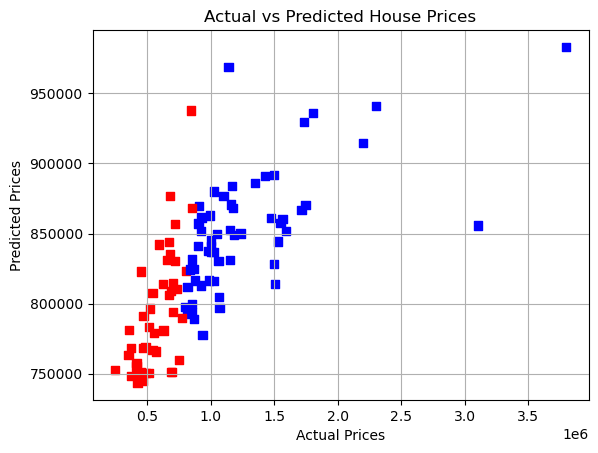

In [14]:
colors = ['red' if pred > actual else 'blue' for pred, actual in zip(y_pred, y_test)]
plt.scatter(y_test, y_pred, marker='s', c=colors)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


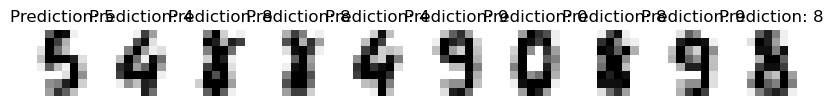

In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# Loading the dataset
digits = datasets.load_digits()

# Generating the classifier
clf = svm.SVC(gamma=0.001, C=100)

# Training the classifier
X, y = digits.data[:-10], digits.target[:-10]
clf.fit(X, y)

# Predicting the output
y_pred = clf.predict(digits.data[-10:])

# Displaying the actual digits and predicted values
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, digits.images[-10:], y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

plt.show()
